In [1]:
import pandas as pd
import os

# Specify the directory containing the files
directory = r'C:\Users\KonstantinGrigorov\OneDrive - ROITI Ltd\Документи\Lichni\Summer Academy 2024 Cases\Crypto\data'

# Initialize an empty dictionary to hold the DataFrames
dataframes = {}

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        file_path = os.path.join(directory, filename)
        prefix = filename.split('_USDT_1m')[0]  # Extract the prefix from the filename
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        df['Crypto'] = prefix  # Add the prefix as a new column named 'Crypto'
        df.set_index('timestamp', inplace=True)  # Set timestamp as index
        dataframes[prefix] = df[['open', 'close']]  # Keep only the open and close price columns

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, axis=1, join='inner')

# Flatten multi-level columns if necessary
if isinstance(combined_df.columns, pd.MultiIndex):
    combined_df.columns = ['_'.join(col).strip() for col in combined_df.columns.values]

# Create a DataFrame for returns
returns_dict = {}

# Calculate returns based on the open price for one row and the close price of the next
for crypto in dataframes.keys():
    open_col = f'{crypto}_open'
    close_col = f'{crypto}_close'
    returns = (combined_df[close_col] - combined_df[open_col]) / combined_df[open_col]
    returns_dict[crypto] = returns

# Combine all returns into a single DataFrame
returns_df = pd.DataFrame(returns_dict).dropna()

# Calculate the correlation matrix of the returns
correlation_matrix = returns_df.corr()

# Display the correlation matrix
print("Correlation matrix of returns based on open and close prices:\n", correlation_matrix)

# Export the correlation matrix to an Excel file
output_file = r'C:\Users\KonstantinGrigorov\OneDrive - ROITI Ltd\Документи\Lichni\Summer Academy 2024 Cases\Crypto\correlation_matrix_open_close_returns.xlsx'
correlation_matrix.to_excel(output_file)

print(f"Correlation matrix of returns based on open and close prices has been exported to {output_file}")


Correlation matrix of returns based on open and close prices:
             ADA      ALGO      ANKR      ATOM       BAT       BNB       BTC  \
ADA    1.000000  0.516425  0.487493  0.605134  0.502425  0.510670  0.570256   
ALGO   0.516425  1.000000  0.459253  0.520095  0.487578  0.409490  0.468894   
ANKR   0.487493  0.459253  1.000000  0.489469  0.481057  0.385360  0.430766   
ATOM   0.605134  0.520095  0.489469  1.000000  0.515314  0.504465  0.566788   
BAT    0.502425  0.487578  0.481057  0.515314  1.000000  0.394159  0.461594   
BNB    0.510670  0.409490  0.385360  0.504465  0.394159  1.000000  0.546224   
BTC    0.570256  0.468894  0.430766  0.566788  0.461594  0.546224  1.000000   
CELR   0.513537  0.499082  0.506396  0.520086  0.542139  0.392870  0.444621   
CHZ    0.469372  0.463983  0.423940  0.492799  0.470735  0.380866  0.411018   
COS    0.053919  0.052659  0.053036  0.050906  0.056200  0.050761  0.066582   
CVC    0.138110  0.151398  0.152857  0.137682  0.163399  0.106840  0

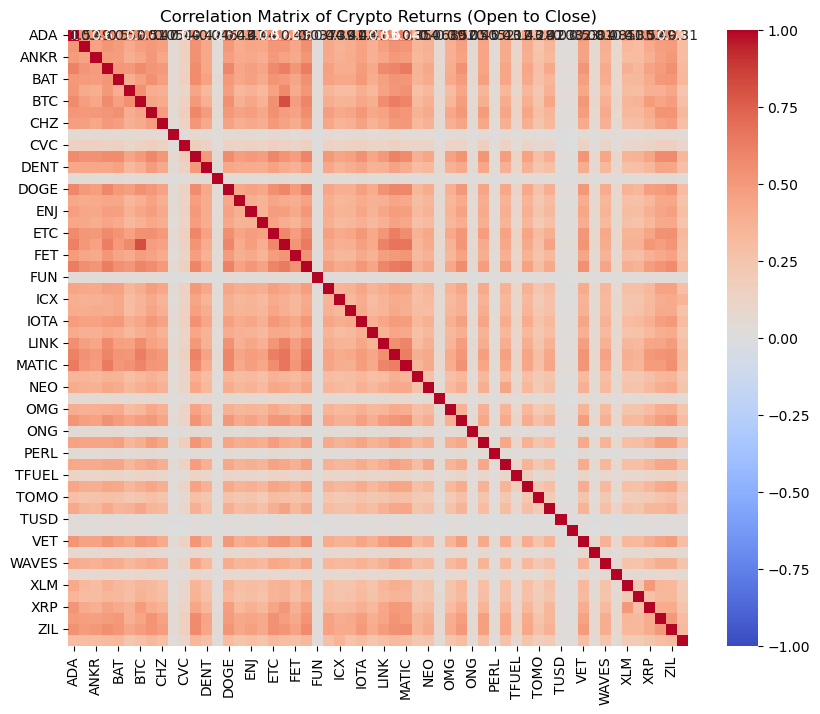

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for returns
returns_dict = {}

# Calculate returns based on the open price for one row and the close price of the next
for crypto in dataframes.keys():
    open_col = f'{crypto}_open'
    close_col = f'{crypto}_close'
    returns = (combined_df[close_col] - combined_df[open_col]) / combined_df[open_col]
    returns_dict[crypto] = returns

# Combine all returns into a single DataFrame
returns_df = pd.DataFrame(returns_dict).dropna()

# Calculate the correlation matrix of the returns
correlation_matrix = returns_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Crypto Returns (Open to Close)')
plt.show()

In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the directory containing the files
directory = r'C:\Users\KonstantinGrigorov\OneDrive - ROITI Ltd\Документи\Lichni\Summer Academy 2024 Cases\Crypto\data'

# Initialize an empty dictionary to hold the DataFrames
dataframes = {}

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        file_path = os.path.join(directory, filename)
        prefix = filename.split('_USDT_1m')[0]  # Extract the prefix from the filename
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        df['Crypto'] = prefix  # Add the prefix as a new column named 'Crypto'
        df.set_index('timestamp', inplace=True)  # Set timestamp as index
        dataframes[prefix] = df[['open', 'close']]  # Keep only the open and close price columns

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, axis=1, join='inner')

# Flatten multi-level columns if necessary
if isinstance(combined_df.columns, pd.MultiIndex):
    combined_df.columns = ['_'.join(col).strip() for col in combined_df.columns.values]

# Create a DataFrame for returns
returns_dict = {}

# Calculate returns based on the open price for one row and the close price of the next
for crypto in dataframes.keys():
    open_col = f'{crypto}_open'
    close_col = f'{crypto}_close'
    returns = (combined_df[close_col].shift(-1) - combined_df[open_col]) / combined_df[open_col]
    returns_dict[crypto] = returns


In [4]:
# Combine all returns into a single DataFrame
returns_df = pd.DataFrame(returns_dict).dropna()

# Calculate the correlation matrix of the returns
correlation_matrix = returns_df.corr()